In [1]:
from dpd.driving import Route, Vehicle
from dpd.osm import OSM

In [8]:
expo_line_west = 2351006
blue_line_north = 2351005
s1_ost_flug = 1773071
bart_red = 2851612
caltrain_local = 2768041
san_bernardino_line = 1287719
orange_county_line = 2812899

relation = bart_red

if relation == bart_red:
    gague = 1.676
else:
    gague = 1.435

osm = OSM()
osm.download_relation(relation)

max_speed_55_mph_vehicle = Vehicle(24.5872, 1.3, -1.3, name="max_speed_55_mph_vehicle")
max_speed_80_mph_vehicle = Vehicle(35.7632, 1.3, -1.3, name="max_speed_80_mph_vehicle")

In [9]:
route = Route.from_osm(osm, relation, tolerance=50, gague=gague)
route.add_vehicle(vehicle)
total_time = (route[route.stop_name != ""]['time_to_next_stop'].sum() + route.dwell_time.sum() - 45 ) / 60
print("total route time: ", total_time)

total route time:  77.56666666666666


/usr/local/lib/python3.7/site-packages/dpd/driving/vehicle.py:19: RuntimeWarning: invalid value encountered in sqrt
  speed_before_segment ** 2 + 2 * acceleration_or_deceleration * distance


In [10]:
route[route.stop_name != ""]

,geometry,stop_name,after_geometry,distance_to_next_point,before_geometry,radius_of_curvature,speed_limit,dwell_time,time_to_next_stop
"(-122.3524152, 37.9359516)",POINT (-2157746.116 58688.255),Richmond,POINT (-2157642.256 58428.959),279.322540,None,5000.000000,81.537288,45,197
"(-122.3162842, 37.9243544)",POINT (-2155238.014 56554.381),El Cerrito del Norte,POINT (-2155225.580 56499.965),55.818164,POINT (-2155287.521 56768.567),137.825627,13.537431,45,170
"(-122.2982985, 37.9017831)",POINT (-2154530.185 53591.972),El Cerrito Plaza,POINT (-2154502.936 53479.126),116.089582,POINT (-2154581.781 53807.997),169.095113,14.994666,45,249
"(-122.2825519, 37.8735592)",POINT (-2154182.053 50041.017),North Berkeley,POINT (-2154117.469 49975.530),91.976350,POINT (-2154324.329 50191.342),149.478741,14.098113,45,116
"(-122.2680976, 37.8693047)",POINT (-2153164.730 49231.298),Downtown Berkeley,POINT (-2153184.690 49130.374),102.878817,POINT (-2153121.763 49452.935),164.321027,14.781477,45,109
"(-122.2701063, 37.8520041)",POINT (-2153881.875 47319.589),Ashby,POINT (-2154030.519 47082.954),279.447626,POINT (-2153759.082 47525.155),259.448106,18.573618,45,163
"(-122.2674761, 37.8278724)",POINT (-2154448.225 44529.718),MacArthur,POINT (-2154480.272 44459.312),77.356333,POINT (-2154376.992 44688.530),125.705983,12.928533,45,166
"(-122.2693076, 37.8072112)",POINT (-2155259.387 42233.958),19th Street Oakland,POINT (-2155644.874 41769.420),603.651523,POINT (-2155102.257 42423.774),425.032918,23.772921,45,44
"(-122.2722398, 37.8025155)",POINT (-2155644.874 41769.420),Oakland City Center - 12th Street,POINT (-2155700.591 41701.068),88.184063,POINT (-2155259.387 42233.958),345.919633,21.446620,45,132
"(-122.2962599, 37.8053537)",POINT (-2157473.530 42636.911),West Oakland,POINT (-2157663.813 42800.322),250.820358,POINT (-2157324.611 42485.137),231.727861,17.553365,45,434


In [11]:
route.folium_map()

/usr/local/lib/python3.7/site-packages/dpd/driving/route.py:113: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  map.add_children(folium.features.GeoJson(self['geometry'].to_crs(epsg='4326').to_json()))


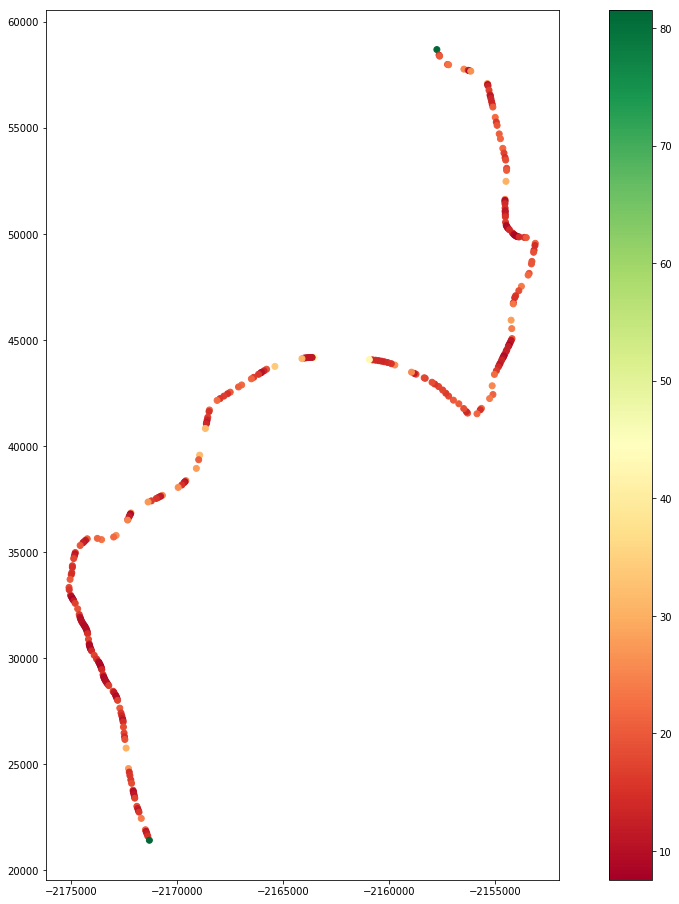

In [12]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
route.plot(column="speed_limit", cmap="RdYlGn", legend=True, ax=ax)
plt.show()